In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [3]:
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/ingr_map.pkl
data/interactions_test.csv
data/interactions_train.csv
data/interactions_validation.csv
data/PP_recipes.csv
data/PP_users.csv
data/RAW_interactions.csv
data/RAW_recipes.csv


In [4]:
df1 = pd.read_csv('data/interactions_test.csv', delimiter=',')
df1.dataframeName = 'interactions_test.csv'

df2 = pd.read_csv('data/interactions_train.csv', delimiter=',')
df2.dataframeName = 'interactions_train.csv'

df3 = pd.read_csv('data/interactions_validation.csv', delimiter=',')
df3.dataframeName = 'interactions_validations.csv'

In [5]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

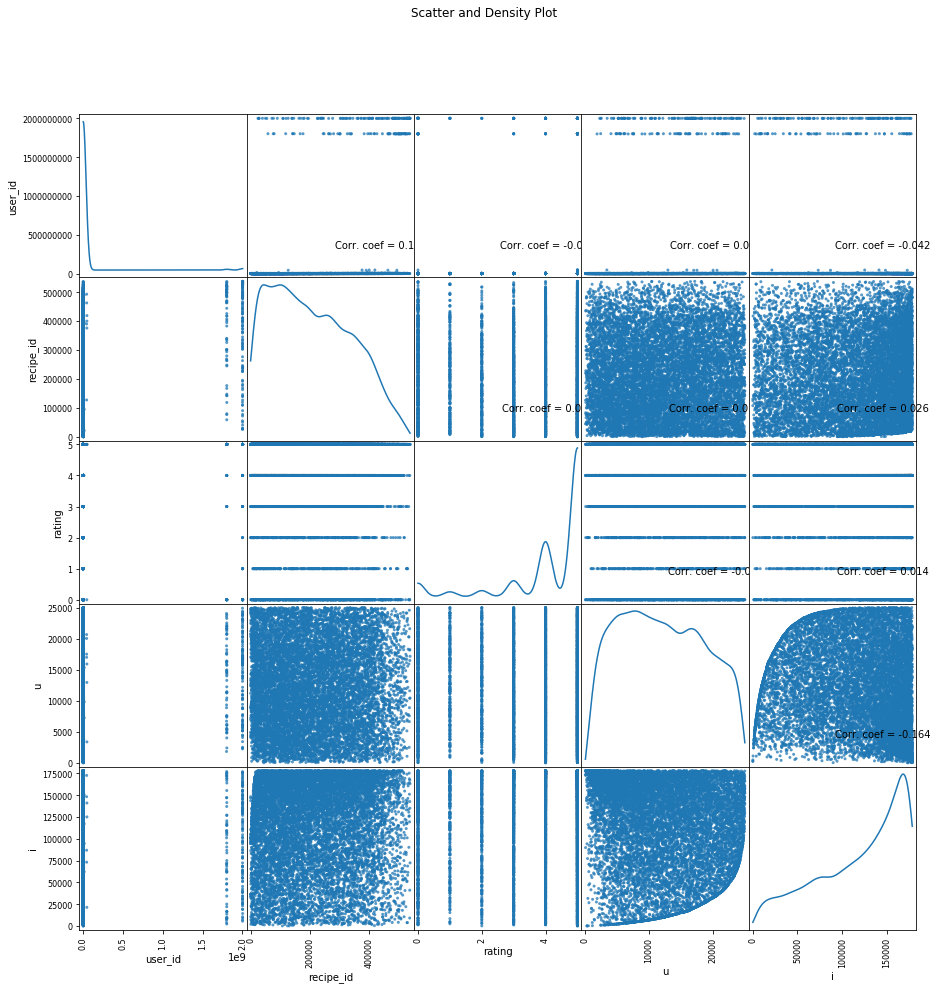

In [6]:
plotScatterMatrix(df1, 15, 10)

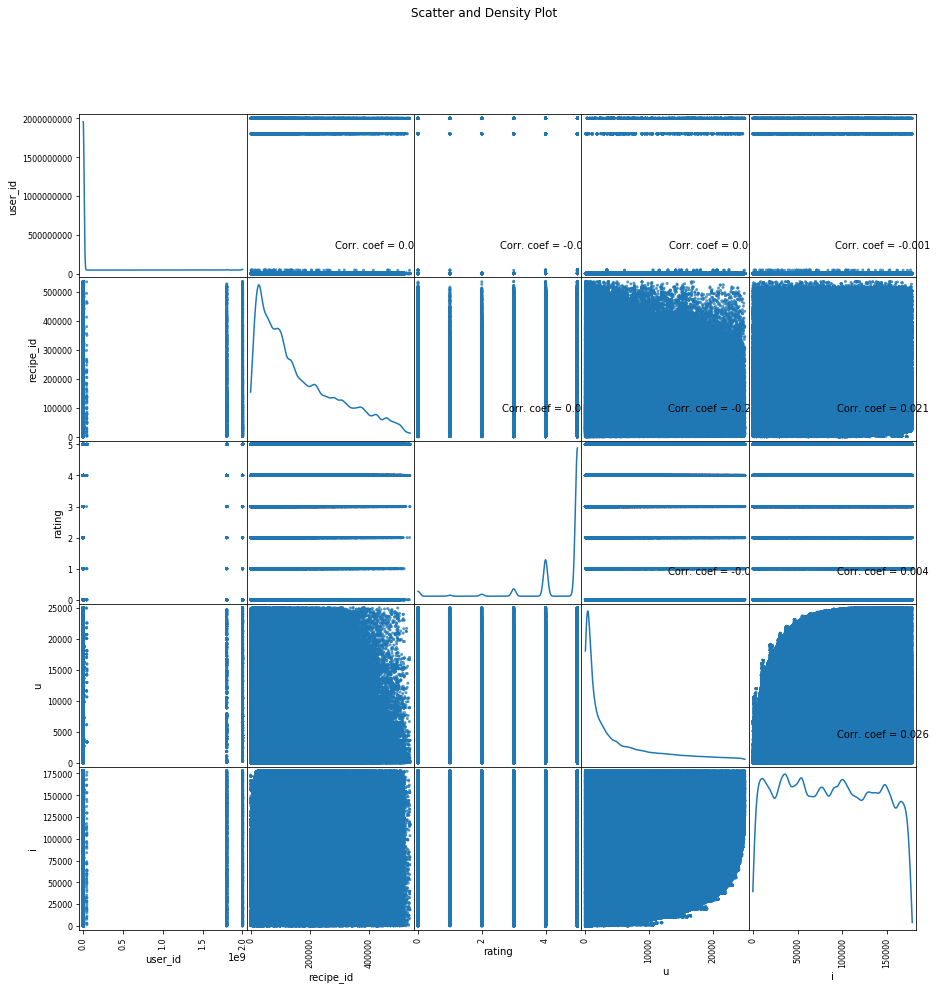

In [7]:
plotScatterMatrix(df2, 15, 10)

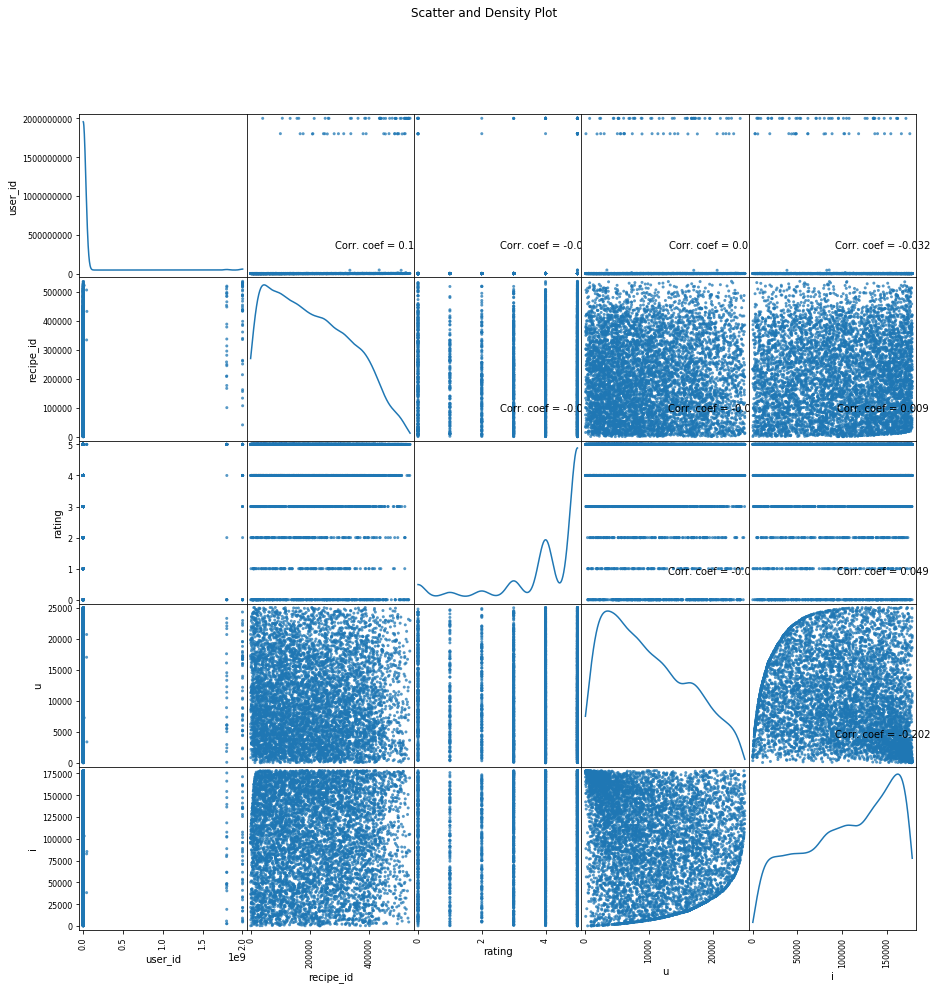

In [8]:
plotScatterMatrix(df3, 15, 10)